<a href="https://colab.research.google.com/github/TimB21/NBA-Win-Loss-Classification-/blob/main/Berlanga_Final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Final Project

## Introduction

**Topic:**
This project aims to predict the outcomes of NBA games based on various features extracted from historical game data. This project utilizes machine learning techniques to build models that forecast whether the home team will win or lose a game. The predictions are made by analyzing factors such as team performance, rest days, and offensive efficiency. The data was obtained from https://github.com/swar/nba_api which provided a framework for data and feature extraction from NBA game data from an online database to support data analysis of basketball for a variety of motivations. The extracted data is stored in CSV format for further analysis. The current features which have been deamed most applicable to predicting team performance are:

**Last Offensive Efficiency:** This feature represents the offensive efficiency (OE) of the team in their last game. Offensive efficiency is a measure of a team's ability to score points per possession.

**Last Game Home Win Percentage:** This feature indicates a team's win percentage in their last home game. It provides insight into team's recent performance in a games.

**Number of Rest Days:** The number of rest days between the team's last game and the current game. This feature captures the potential fatigue or freshness of a team.

**Last Game Away Win Percentage:** Similar to the second feature, this represents the team's win percentage in their away last game, reflecting their performance in away games.

**Last Game Total Win Percentage:** The total win percentage of the team in their last game, regardless of the location. It offers a broader perspective on the team's recent success.

**Last Game Rolling Scoring Margin:** This feature calculates the rolling average of the scoring margin (points scored minus points allowed) for the team over a specified window of games.

**Last Game Rolling Offensive Efficiency:** Similar to the first feature, this calculates the rolling average of the offensive efficiency for the team over a specified window of games.

Each entry has these features to indicate how the team has played in the previous home and away games.

**Goal:** Using these features, I will create a variety of model's to determine which one will be the most accurate in predicting the winner of an NBA game using this set of features.

**Project planning**
1. Import/Clean the data
2. Explore the data
3. Visualize data
4. Split the data and perform preprocessing
5. Create the evaluate performance metrics function which will create the model, fit it to the training set, and obtaining it's performing on the testing and cross validation sets
6. Run each of the models and use classification report to obtain performance metrics to see how the model performed on testing data and cross validation data using the evaluate performance metrics function
8. Determine which model is the best predictor and what length of the season to train the model on

## Import/Clean the Data

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from google.colab import drive

# import the data by mounting to my google drive and reading the csv from the correct file path
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/nbaHomeWinLossModelDataset.csv'
data = pd.read_csv(file_path).drop(['Unnamed: 0'],axis=1)

# drop nan values
data = data.dropna()

# Count the number of rows with any null values
num_null_rows = data[data.isnull().any(axis=1)].shape[0]

# Print the result
print(f"Number of rows with null values: {num_null_rows}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of rows with null values: 0


## Explore the data and perform preprocessing

In [ ]:
# Display the first ten rows of the data frame
data.head(10)

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,HOME_W,SEASON,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE
0,0.555556,0.685714,3.0,0.444444,0.563380,9.333333,0.571405,1,2020-21,0.612903,0.250000,2.0,0.228571,0.239437,-2.000000,0.605315
1,0.573913,0.676471,1.0,0.444444,0.557143,-0.666667,0.589472,1,2020-21,0.500000,0.305556,2.0,0.303030,0.304348,-18.000000,0.512228
2,0.584746,0.666667,2.0,0.444444,0.550725,8.666667,0.640592,1,2020-21,0.612403,0.500000,2.0,0.428571,0.463768,0.666667,0.567718
3,0.609756,0.656250,4.0,0.444444,0.544118,11.333333,0.653327,1,2020-21,0.539568,0.500000,2.0,0.441176,0.470588,0.666667,0.570866
4,0.512397,0.354839,1.0,0.558824,0.461538,11.000000,0.596498,1,2020-21,0.727273,0.656250,1.0,0.457143,0.552239,17.333333,0.633081
5,0.622951,0.645161,2.0,0.457143,0.545455,-0.666667,0.561996,1,2020-21,0.666667,0.735294,1.0,0.709677,0.723077,13.333333,0.644613
6,0.549020,0.633333,2.0,0.457143,0.538462,-18.333333,0.507124,1,2020-21,0.596639,0.500000,1.0,0.625000,0.562500,16.666667,0.599989
7,0.514019,0.620690,1.0,0.457143,0.531250,-26.666667,0.480273,1,2020-21,0.521739,0.387097,1.0,0.437500,0.412698,-7.000000,0.568524
8,0.669565,0.774194,2.0,0.548387,0.661290,12.333333,0.569549,1,2020-21,0.458333,0.620690,2.0,0.470588,0.539683,-17.000000,0.489968
9,0.596774,0.766667,2.0,0.548387,0.655738,-4.666667,0.549138,1,2020-21,0.468468,0.620690,2.0,0.484848,0.548387,2.666667,0.540221


In [ ]:
# Check data types of each column
print(data.dtypes)

# Check dimensions of the dataset (rows, columns)
print('Shape:')
print(data.shape)

HOME_LAST_GAME_OE                        float64
HOME_LAST_GAME_HOME_WIN_PCTG             float64
HOME_NUM_REST_DAYS                       float64
HOME_LAST_GAME_AWAY_WIN_PCTG             float64
HOME_LAST_GAME_TOTAL_WIN_PCTG            float64
HOME_LAST_GAME_ROLLING_SCORING_MARGIN    float64
HOME_LAST_GAME_ROLLING_OE                float64
HOME_W                                     int64
SEASON                                    object
AWAY_LAST_GAME_OE                        float64
AWAY_LAST_GAME_HOME_WIN_PCTG             float64
AWAY_NUM_REST_DAYS                       float64
AWAY_LAST_GAME_AWAY_WIN_PCTG             float64
AWAY_LAST_GAME_TOTAL_WIN_PCTG            float64
AWAY_LAST_GAME_ROLLING_SCORING_MARGIN    float64
AWAY_LAST_GAME_ROLLING_OE                float64
dtype: object
Shape:
(3406, 16)


The shape of the dataset indicates that the dataset contains 3406 datapoints and 16 columns. These 16 columns include the home features for the team, the away features for the team, the current season, and the binary home_w indicating if the team associated with this row won or lost this game.

## Visualize the Data

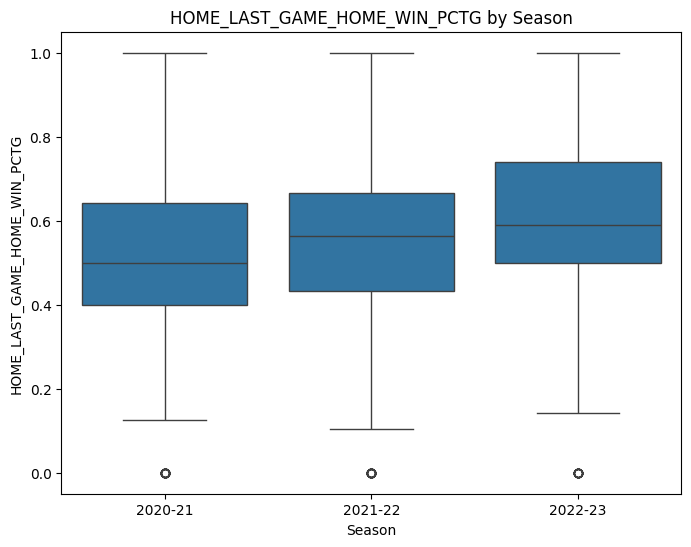

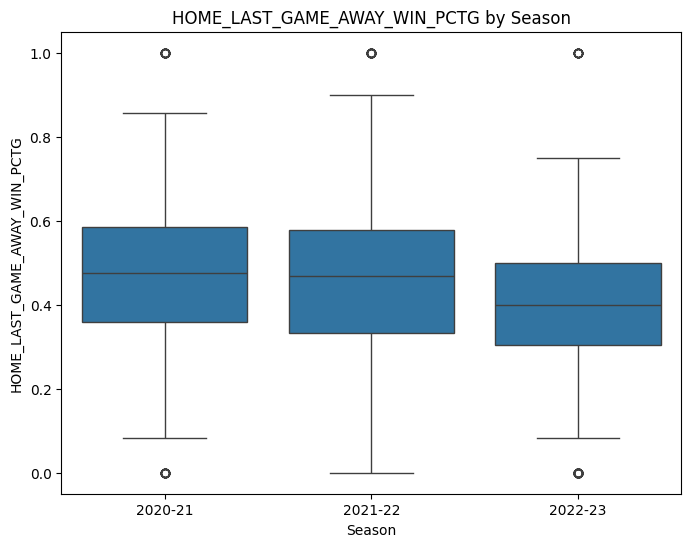

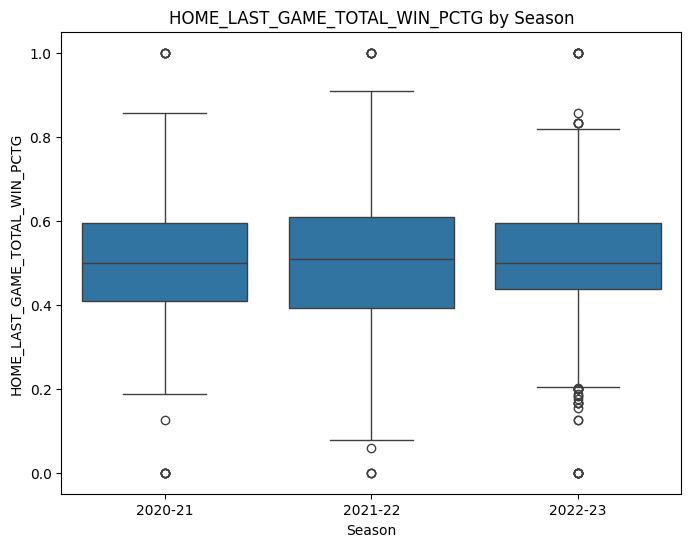

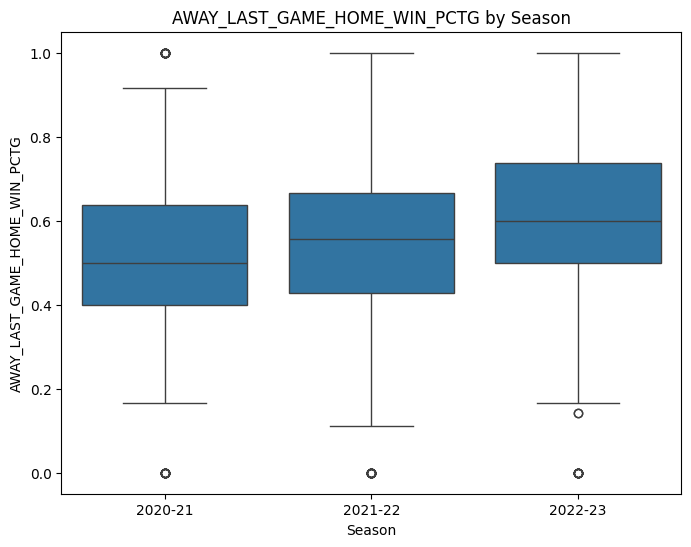

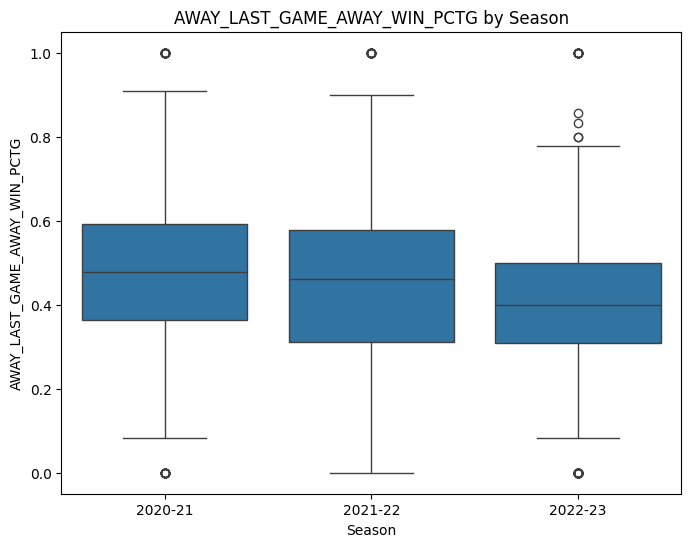

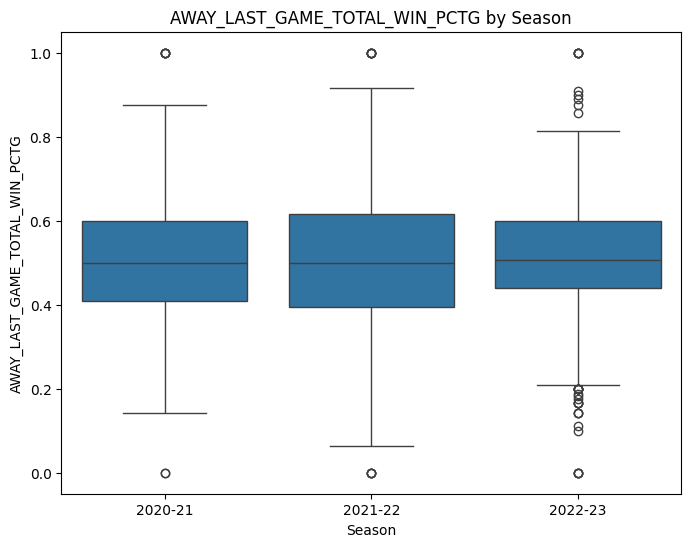

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to visualize
home_cols = ['HOME_LAST_GAME_HOME_WIN_PCTG', 'HOME_LAST_GAME_AWAY_WIN_PCTG', 'HOME_LAST_GAME_TOTAL_WIN_PCTG']
away_cols = ['AWAY_LAST_GAME_HOME_WIN_PCTG', 'AWAY_LAST_GAME_AWAY_WIN_PCTG', 'AWAY_LAST_GAME_TOTAL_WIN_PCTG']

# Box Plots (against 'SEASON')
for col in home_cols + away_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='SEASON', y=col, data=data)  # Use 'df' instead of 'data'
  plt.title(f'{col} by Season')
  plt.xlabel('Season')
  plt.ylabel(col)
  plt.show()

## Split the data and perform preprocessing

In [ ]:
# https://github.com/swar/nba_api/blob/master/docs/examples/Home%20Team%20Win-Loss%20Modeling/Home%20Team%20Win-Loss%20Modeling.ipynb

# Split data into test and training sets based on the season
# Training data for past two seasons
train = data[data["SEASON"] == ("2020-21" and "2021-22")].sample(frac=1)

# Cross validation
cv = data[data['SEASON'] == '2022-23']

# Randomly shuffle the test set for the 2021-22 season
train1 = data[data["SEASON"] == ("2021-22")].sample(frac=1)

# Separate features (X) and target variable (y)
X = train.drop(['HOME_W', 'SEASON'], axis=1)
y = train['HOME_W']  # Target variable ('HOME_W')

# Split the dataset into training and testing subsets for the 2020-21/2021-22 training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 20% of data is used for testing

# Separate features (X1) and target variable (y1) for the 2021-22 training dataset
X1 = train1.drop(['HOME_W', 'SEASON'], axis=1)
y1 = train1['HOME_W']  # Target variable ('HOME_W')

# Split the dataset into training and testing subsets for the 2021-22 test dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)  # 20% of data is used for testing

# Standard Scaling for the 2020-21/2021-22 test dataset
# Initialize the scaler and fit it on the training features
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# Scale the training and testing features for the 2020-21/2021-22 test dataset
scaled_data_train = scaler.transform(X_train)  # Scaled training data
scaled_data_test = scaler.transform(X_test)    # Scaled testing data

# Standard Scaling for the 2021-22 test dataset
# Initialize a new scaler and fit it on the training features
scaler1 = preprocessing.StandardScaler()
scaler1.fit(X1_train)

# Scale the training and testing features for the 2021-22 test dataset
scaled_data_train1 = scaler.transform(X1_train)  # Scaled training data
scaled_data_test1 = scaler.transform(X1_test)    # Scaled testing data

# Print the shapes of training and testing data for 20-22 seasons
print("Shape of Training and Testing Data for 20-22 Training Data")
print(train.shape)  # Shape of training data for 2022-23 season
print(cv.shape)   # Shape of testing data for 2020-21/2021-22 seasons

# Print the shapes of training and testing data for 21-22 season
print("Shape of Training and Testing Data for 21-22 Training Data")
print(train1.shape)  # Shape of training data for 2022-23 season
print(cv.shape)   # Shape of testing data for 2021-22 season

Shape of Training and Testing Data for 20-22 Training Data
(1189, 16)
(1183, 16)
Shape of Training and Testing Data for 21-22 Training Data
(1189, 16)
(1183, 16)


## Evaluate Performance Metrics Function

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

# dictionary to store the weighted accuracy which will be used as our metric to determine which
# model is the best predictor
model_weighted_averages = {}

def evaluate_classification_model(model, scaled_data_train, y_train, scaled_data_test, y_test, test_data, model_name):
    """
    Evaluates a given classification model, performs cross-validation,
    and prints evaluation results.

    Args:
        model: The classification model object (e.g., KNeighborsClassifier, LogisticRegression, etc.).
        scaled_data_train: Scaled training data.
        y_train: Training labels.
        scaled_data_test: Scaled testing data.
        y_test: Testing labels.
        test_data: Unseen data for final evaluation.
        model_name: String, name of the model (e.g., 'KNN', 'Logistic Regression', etc.).

    Returns:
        None
    """

    # Train the model on scaled training data
    model.fit(scaled_data_train, y_train)

    # Predict the outcomes using the trained model on the test data
    y_pred = model.predict(scaled_data_test)

    # Print a summary of the model's performance on the current training/testing split
    print(f"Analysis for {model_name} Model\n")
    print("Classification Report for Testing Data From the Training Split")
    print(classification_report(y_test, y_pred))

    # Standard Scaling for unseen prediction variables
    # Initialize the scaler and fit it to the features of the unseen test data
    scaler = preprocessing.StandardScaler()
    scaler.fit(cv.drop(['HOME_W', 'SEASON'], axis=1))

    # Transform the unseen test data using the fitted scaler
    scaled_val_data = scaler.transform(cv.drop(['HOME_W', 'SEASON'], axis=1))

    # Predict outcomes for crossvalidation test data and evaluate the model's performance
    y_pred = model.predict(scaled_val_data)
    print("Classification Report for Predictions on the 2022-2023 Season")
    print(classification_report(test_data['HOME_W'], y_pred))
    print("###################################################################")

    # Train a new model on a different dataset
    model.fit(scaled_data_train1, y1_train)

    # Predict the outcomes using the new trained model on the new test data
    y1_pred = model.predict(scaled_data_test1)

    # Print a summary of the model's performance on the new training/testing split
    print("Analysis for Decision Tree Model trained on the 2021-2022 Season Data\n")
    print("Classification report for Testing Data From the Training Split")
    print(classification_report(y1_test, y1_pred))

    # Predict outcomes for the unseen test data (new dataset) using the model
    y1_pred = model.predict(scaled_val_data)
    print("Classification Report for predictions on 2022-2023 Season")
    print(classification_report(test_data['HOME_W'], y1_pred))


## Obtain the classification report for each of the models on the different training lengths

In [ ]:
evaluate_classification_model(DecisionTreeClassifier(), scaled_data_train, y_train, scaled_data_test, y_test, cv,'Decision Tree')

Analysis for Decision Tree Model

Classification Report for Testing Data From the Training Split
              precision    recall  f1-score   support

           0       0.50      0.53      0.51       106
           1       0.60      0.58      0.59       132

    accuracy                           0.55       238
   macro avg       0.55      0.55      0.55       238
weighted avg       0.56      0.55      0.56       238

Classification Report for Predictions on the 2022-2023 Season
              precision    recall  f1-score   support

           0       0.47      0.54      0.50       493
           1       0.63      0.56      0.60       690

    accuracy                           0.56      1183
   macro avg       0.55      0.55      0.55      1183
weighted avg       0.57      0.56      0.56      1183

###################################################################
Analysis for Decision Tree Model trained on the 2021-2022 Season Data

Classification report for Testing Data From the 

In [ ]:
model_weighted_averages['Decision Tree (20-22)'] = [0.56,0.56]
model_weighted_averages['Decision Tree (21-22)'] = [0.57,0.52]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
evaluate_classification_model(RandomForestClassifier(), scaled_data_train, y_train, scaled_data_test, y_test, cv, 'Random Forest')

Analysis for Random Forest Model

Classification Report for Testing Data From the Training Split
              precision    recall  f1-score   support

           0       0.51      0.55      0.53       106
           1       0.61      0.58      0.59       132

    accuracy                           0.56       238
   macro avg       0.56      0.56      0.56       238
weighted avg       0.57      0.56      0.56       238

Classification Report for Predictions on the 2022-2023 Season
              precision    recall  f1-score   support

           0       0.51      0.55      0.53       493
           1       0.66      0.62      0.64       690

    accuracy                           0.59      1183
   macro avg       0.58      0.58      0.58      1183
weighted avg       0.59      0.59      0.59      1183

###################################################################
Analysis for Decision Tree Model trained on the 2021-2022 Season Data

Classification report for Testing Data From the 

In [ ]:
model_weighted_averages['Random Forest (20-22)'] = [0.56,0.59]
model_weighted_averages['Random Forest (21-22)'] = [0.64,0.59]

In [ ]:
from xgboost import XGBClassifier

evaluate_classification_model(XGBClassifier(), scaled_data_train, y_train, scaled_data_test, y_test, cv, 'XGBoost')

Analysis for XGBoost Model

Classification Report for Testing Data From the Training Split
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       106
           1       0.61      0.57      0.59       132

    accuracy                           0.56       238
   macro avg       0.56      0.56      0.56       238
weighted avg       0.57      0.56      0.56       238

Classification Report for Predictions on the 2022-2023 Season
              precision    recall  f1-score   support

           0       0.45      0.66      0.54       493
           1       0.64      0.42      0.51       690

    accuracy                           0.52      1183
   macro avg       0.54      0.54      0.52      1183
weighted avg       0.56      0.52      0.52      1183

###################################################################
Analysis for Decision Tree Model trained on the 2021-2022 Season Data

Classification report for Testing Data From the Traini

In [ ]:
model_weighted_averages['XGBoost (20-22)'] = [0.56,0.52]
model_weighted_averages['XGBoost (21-22)'] = [0.64,0.55]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

evaluate_classification_model(KNeighborsClassifier(n_neighbors=5), scaled_data_train, y_train, scaled_data_test, y_test, cv, 'KNN')

Analysis for KNN Model

Classification Report for Testing Data From the Training Split
              precision    recall  f1-score   support

           0       0.51      0.45      0.48       106
           1       0.59      0.64      0.62       132

    accuracy                           0.56       238
   macro avg       0.55      0.55      0.55       238
weighted avg       0.55      0.56      0.56       238

Classification Report for Predictions on the 2022-2023 Season
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       493
           1       0.64      0.65      0.65       690

    accuracy                           0.58      1183
   macro avg       0.57      0.57      0.57      1183
weighted avg       0.58      0.58      0.58      1183

###################################################################
Analysis for Decision Tree Model trained on the 2021-2022 Season Data

Classification report for Testing Data From the Training S

In [ ]:
model_weighted_averages['KNN (20-22)'] = [0.56,0.58]
model_weighted_averages['KNN (21-22)'] = [0.57,0.58]

In [ ]:
from sklearn.linear_model import LogisticRegression

evaluate_classification_model(LogisticRegression(), scaled_data_train, y_train, scaled_data_test, y_test, cv, 'Logistic Regression')

Analysis for Logistic Regression Model

Classification Report for Testing Data From the Training Split
              precision    recall  f1-score   support

           0       0.56      0.50      0.53       106
           1       0.63      0.69      0.66       132

    accuracy                           0.61       238
   macro avg       0.60      0.59      0.59       238
weighted avg       0.60      0.61      0.60       238

Classification Report for Predictions on the 2022-2023 Season
              precision    recall  f1-score   support

           0       0.53      0.50      0.51       493
           1       0.65      0.68      0.67       690

    accuracy                           0.60      1183
   macro avg       0.59      0.59      0.59      1183
weighted avg       0.60      0.60      0.60      1183

###################################################################
Analysis for Decision Tree Model trained on the 2021-2022 Season Data

Classification report for Testing Data Fro

In [ ]:
model_weighted_averages['Logistic Regression (20-22)'] = [0.60,0.60]
model_weighted_averages['Logistic Regression (21-22)'] = [0.63,0.60]

In [ ]:
from sklearn.naive_bayes import GaussianNB

evaluate_classification_model(GaussianNB(), scaled_data_train, y_train, scaled_data_test, y_test, cv, 'Naive Bayes')

Analysis for Naive Bayes Model

Classification Report for Testing Data From the Training Split
              precision    recall  f1-score   support

           0       0.57      0.56      0.56       106
           1       0.65      0.66      0.65       132

    accuracy                           0.61       238
   macro avg       0.61      0.61      0.61       238
weighted avg       0.61      0.61      0.61       238

Classification Report for Predictions on the 2022-2023 Season
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       493
           1       0.65      0.65      0.65       690

    accuracy                           0.59      1183
   macro avg       0.58      0.58      0.58      1183
weighted avg       0.59      0.59      0.59      1183

###################################################################
Analysis for Decision Tree Model trained on the 2021-2022 Season Data

Classification report for Testing Data From the Tr

In [ ]:
model_weighted_averages['Naive Bayes (20-22)'] = [0.61,0.59]
model_weighted_averages['Naive Bayes(21-22)'] = [0.64,0.59]

## Conclusion

In [ ]:
import pandas as pd

data = []

for model_name, values in model_weighted_averages.items():
    # Extract testing weighted accuracy and cross-validation accuracy
    testing_weighted_accuracy = values[0]  # First element in the list
    cross_val_weighted_accuracy = values[1]  # Second element in the list

    # Append data to the list
    data.append([model_name, testing_weighted_accuracy, cross_val_weighted_accuracy])

# Create a Pandas DataFrame from the data
df_weighted_averages = pd.DataFrame(data, columns=['Model', 'Testing Weighted Accuracy', 'Cross-Validation Weighted Accuracy'])

# Sort the DataFrame by 'Cross-Validation Weighted Accuracy' in descending order
df_sorted = df_weighted_averages.sort_values(by=['Testing Weighted Accuracy'], ascending=False)

# Print the sorted DataFrame
display(df_sorted)


,Model,Testing Weighted Accuracy,Cross-Validation Weighted Accuracy
3,Random Forest (21-22),0.64,0.59
5,XGBoost (21-22),0.64,0.55
11,Naive Bayes(21-22),0.64,0.59
9,Logistic Regression (21-22),0.63,0.60
10,Naive Bayes (20-22),0.61,0.59
8,Logistic Regression (20-22),0.60,0.60
1,Decision Tree (21-22),0.57,0.52
7,KNN (21-22),0.57,0.58
0,Decision Tree (20-22),0.56,0.56
2,Random Forest (20-22),0.56,0.59


In [ ]:
# Sort the DataFrame by 'Cross-Validation Weighted Accuracy' in descending order
df_sorted = df_weighted_averages.sort_values(by=['Cross-Validation Weighted Accuracy'], ascending=False)

# Print the sorted DataFrame
display(df_sorted)

,Model,Testing Weighted Accuracy,Cross-Validation Weighted Accuracy
8,Logistic Regression (20-22),0.60,0.60
9,Logistic Regression (21-22),0.63,0.60
2,Random Forest (20-22),0.56,0.59
3,Random Forest (21-22),0.64,0.59
10,Naive Bayes (20-22),0.61,0.59
11,Naive Bayes(21-22),0.64,0.59
6,KNN (20-22),0.56,0.58
7,KNN (21-22),0.57,0.58
0,Decision Tree (20-22),0.56,0.56
5,XGBoost (21-22),0.64,0.55


**Overfitting in Complex Models:**
XGBoost (21-22) and Decision Trees show significant gaps between testing and cross-validation accuracies, reflecting overfitting.

**Consistency in Simpler Models:**
Logistic Regression and Naive Bayes deliver stable results, as their simplicity prevents overfitting but limits their ability to capture complex patterns.
Dataset Size Matters:

Models like XGBoost (20-22) and Random Forest (20-22) perform slightly worse than their 21-22 counterparts, suggesting that the larger dataset (20-22) introduces more noise or variability, affecting performance.
Feature Complexity:

Models like KNN and Naive Bayes, which struggle with interdependent features, underperform due to the intricate nature of NBA data, where feature interactions are critical.

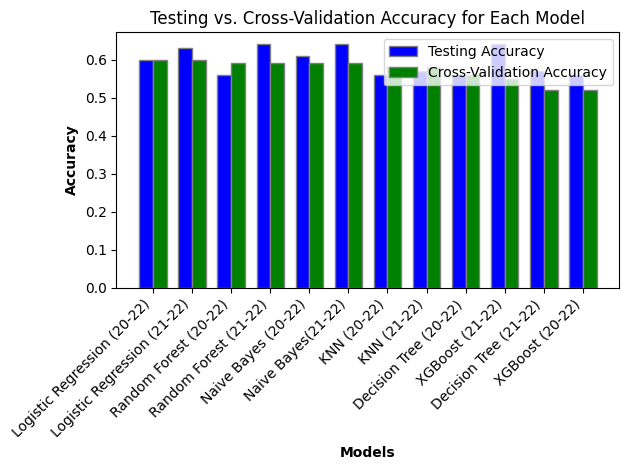

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get unique model names
models = df_sorted['Model'].unique()

# Get testing and cross-validation accuracies
testing_accuracy = df_sorted['Testing Weighted Accuracy'].values
cross_val_accuracy = df_sorted['Cross-Validation Weighted Accuracy'].values

# Set width of bars
bar_width = 0.35

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Create the bar graph
plt.bar(r1, testing_accuracy, color='b', width=bar_width, edgecolor='grey', label='Testing Accuracy')
plt.bar(r2, cross_val_accuracy, color='g', width=bar_width, edgecolor='grey', label='Cross-Validation Accuracy')

# Add labels, title, and legend
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=45, ha='right')  # Rotate x-axis labels
plt.title('Testing vs. Cross-Validation Accuracy for Each Model')
plt.legend()

# Show the graph
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()